In [725]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import os

%matplotlib inline

wb = openpyxl.load_workbook('RetailMartV2.xlsx')
wb2 = openpyxl.load_workbook('RetailMartV1.xlsx')


C:\Anaconda3\lib\site-packages\openpyxl\reader\worksheet.py:322: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [726]:
wb.get_sheet_names()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  


['Training Data']

In [727]:
trainingset = wb.get_sheet_by_name('Training Data')
testset = wb2.get_sheet_by_name('Test Set')
print(trainingset['A1'].value + ", " + trainingset['B1'].value)

Implied Gender, Home/Apt/ PO Box


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


In [728]:
s = ""
for i in range(1, trainingset.max_row + 1): 
    for j in range(1, trainingset.max_column - 1):
        s = s + str(trainingset.cell(row=i, column=j).value) + "      "
    s = s + "\n"
print(s)

Implied Gender      Home/Apt/ PO Box      Pregnancy Test      Birth Control      Feminine Hygiene      Folic Acid      Prenatal Vitamins      Prenatal Yoga      Body Pillow      Ginger Ale      Sea Bands      Stopped buying ciggies      Cigarettes      Smoking Cessation      Stopped buying wine      Wine      Maternity Clothes      
M      A      1      0      0      0      1      0      0      0      0      0      0      0      0      0      0      
M      H      1      0      0      0      1      0      0      0      0      0      0      0      0      0      0      
M      H      1      0      0      0      0      0      0      0      1      0      0      0      0      0      0      
U      H      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      
F      A      0      0      0      0      0      1      0      0      0      0      0      0      1      0      0      
F      H      0      0      0      0      1      0      0      0 

In [729]:
def GenderIsMale(Gender):
    if(Gender == 'M'):
        return 1
    if(Gender == 'F' or Gender == 'U'):
        return 0
    else:
        return "Male"
    
def GenderIsFemale(Gender):
    if(Gender =='F'):
        return 1
    if(Gender == 'M' or Gender == 'U'):
        return 0
    else:
        return "Female"

def HuisIsApt(Addres):
    if(Addres == 'H'):
        return 0
    if(Addres == 'A'):
        return 1
    if(Addres == 'P'):
        return 0
    else:
        return "Apt"
    
def HuisIsHome(Addres):
    if(Addres == 'H'):
        return 1
    if(Addres == 'A'):
        return 0
    if(Addres == 'P'):
        return 0    
    else:
        return "Home"


In [731]:
trainingset.insert_cols(2, 1)
trainingset.insert_cols(4, 1)
wb.save('RetailMartV3.xlsx') 

In [732]:
wb = openpyxl.load_workbook('RetailMartV3.xlsx')
wb.get_sheet_names()


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  This is separate from the ipykernel package so we can avoid doing imports until


['Training Data']

In [733]:
trainingsetTemp = wb.get_sheet_by_name('Training Data')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """Entry point for launching an IPython kernel.


In [734]:
#loop kolom B
for i in range(1, trainingsetTemp.max_row + 1): #voor elke raw in kolom A dan wordt de waarde gecontrolleert en wordt in kolom B wat geschreven.
    trainingsetTemp[ 'B' + str(i) ].value = GenderIsFemale(trainingsetTemp[ 'A' + str(i) ].value)
#loop kolom A
for i in range(1, trainingsetTemp.max_row + 1):
    trainingsetTemp[ 'A' + str(i) ].value = GenderIsMale(trainingsetTemp[ 'A' + str(i) ].value)
#loop kolom D
for i in range(1, trainingsetTemp.max_row + 1):
    trainingsetTemp[ 'D' + str(i) ].value = HuisIsApt(trainingsetTemp[ 'C' + str(i) ].value)
#loop kolom C
for i in range(1, trainingsetTemp.max_row + 1):
    trainingsetTemp[ 'C' + str(i) ].value = HuisIsHome(trainingsetTemp[ 'C' + str(i) ].value)   
#opslaan als nieuwe excel bestand met dummy data.
wb.save('RetailMartDummyVarsV1.xlsx')

#worksheet naar de juiste zetten:
wb = openpyxl.load_workbook('RetailMartDummyVarsV1.xlsx')
trainingset = wb.get_sheet_by_name('Training Data')
#printen om te controleren
s = ""
for i in range(1, trainingset.max_row + 1): 
    for j in range(1, trainingset.max_column - 1):
        s = s + str(trainingset.cell(row=i, column=j).value) + "      "
    s = s + "\n"
print(s)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).


Male      Female      Home      Apt      Pregnancy Test      Birth Control      Feminine Hygiene      Folic Acid      Prenatal Vitamins      Prenatal Yoga      Body Pillow      Ginger Ale      Sea Bands      Stopped buying ciggies      Cigarettes      Smoking Cessation      Stopped buying wine      Wine      Maternity Clothes      
1      0      0      1      1      0      0      0      1      0      0      0      0      0      0      0      0      0      0      
1      0      1      0      1      0      0      0      1      0      0      0      0      0      0      0      0      0      0      
1      0      1      0      1      0      0      0      0      0      0      0      1      0      0      0      0      0      0      
0      0      1      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      
0      1      0      1      0      0      0      0      0      1      0      0      0      0      0      0      1      0      0   

In [736]:

trainingset.insert_cols(20, 1)
wb.save('RetailMartV4.xlsx') 
wb = openpyxl.load_workbook('RetailMartV4.xlsx')
trainingset = wb.get_sheet_by_name('Training Data')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """


In [737]:

trainingset['T1'].value = "Intercept"
#vervolgens alle rijen invullen met 1 T(2 t/m last):
for i in range(2, trainingset.max_row + 1):
    trainingset[ 'T' + str(i) ].value = 1
wb.save('RetailMartIntercept.xlsx') 
wb = openpyxl.load_workbook('RetailMartIntercept.xlsx')
trainingset = wb.get_sheet_by_name('Training Data')    

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  # Remove the CWD from sys.path while we load stuff.


In [738]:
s = ""
for i in range(1, trainingset.max_row + 1): 
    for j in range(1, trainingset.max_column - 1):
        s = s + str(trainingset.cell(row=i, column=j).value) + "      "
    s = s + "\n"
print(s)

Male      Female      Home      Apt      Pregnancy Test      Birth Control      Feminine Hygiene      Folic Acid      Prenatal Vitamins      Prenatal Yoga      Body Pillow      Ginger Ale      Sea Bands      Stopped buying ciggies      Cigarettes      Smoking Cessation      Stopped buying wine      Wine      Maternity Clothes      Intercept      
1      0      0      1      1      0      0      0      1      0      0      0      0      0      0      0      0      0      0      1      
1      0      1      0      1      0      0      0      1      0      0      0      0      0      0      0      0      0      0      1      
1      0      1      0      1      0      0      0      0      0      0      0      1      0      0      0      0      0      0      1      
0      0      1      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      1      
0      1      0      1      0      0      0      0      0      1      0      0      0  

In [739]:


from sklearn import linear_model
from openpyxl import workbook
from openpyxl.styles import Border, Side, Color
from openpyxl.utils.dataframe import dataframe_to_rows


In [740]:
df = pd.DataFrame(trainingset.values)
df.head()
#df.tail()

0       1     2    3               4              5                 6   \
0  Male  Female  Home  Apt  Pregnancy Test  Birth Control  Feminine Hygiene   
1     1       0     0    1               1              0                 0   
2     1       0     1    0               1              0                 0   
3     1       0     1    0               1              0                 0   
4     0       0     1    0               0              0                 0   

           7                  8              9     ...            12  \
0  Folic Acid  Prenatal Vitamins  Prenatal Yoga    ...     Sea Bands   
1           0                  1              0    ...             0   
2           0                  1              0    ...             0   
3           0                  0              0    ...             1   
4           0                  0              0    ...             0   

                       13          14                 15                   16  \
0  Stopped buying ciggies  Cigarettes  Smoking Cessation  Stopped buying wine   
1                       0           0                  0                    0   
2                       0           0                  0                    0   
3                       0           0                  0                    0   
4                       0           0                  0                    0   

     17                 18         19    20        21  
0  Wine  Maternity Clothes  Intercept  None  PREGNANT  
1     0                  0          1  None         1  
2     0                  0          1  None         1  
3     0                  0          1  None         1  
4     0                  0          1  None         1  

[5 rows x 22 columns]

In [741]:
#controleren voor nulls
df.isnull().head(10)


0      1      2      3      4      5      6      7      8      9   \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   
5  False  False  False  False  False  False  False  False  False  False   
6  False  False  False  False  False  False  False  False  False  False   
7  False  False  False  False  False  False  False  False  False  False   
8  False  False  False  False  False  False  False  False  False  False   
9  False  False  False  False  False  False  False  False  False  False   

   ...       12     13     14     15     16     17     18     19    20     21  
0  ...    False  False  False  False  False  False  False  False  True  False  
1  ...    False  False  False  False  False  False  False  False  True  False  
2  ...    False  False  False  False  False  False  False  False  True  False  
3  ...    False  False  False  False  False  False  False  False  True  False  
4  ...    False  False  False  False  False  False  False  False  True  False  
5  ...    False  False  False  False  False  False  False  False  True  False  
6  ...    False  False  False  False  False  False  False  False  True  False  
7  ...    False  False  False  False  False  False  False  False  True  False  
8  ...    False  False  False  False  False  False  False  False  True  False  
9  ...    False  False  False  False  False  False  False  False  True  False  

[10 rows x 22 columns]

In [742]:

df.head()

0       1     2    3               4              5                 6   \
0  Male  Female  Home  Apt  Pregnancy Test  Birth Control  Feminine Hygiene   
1     1       0     0    1               1              0                 0   
2     1       0     1    0               1              0                 0   
3     1       0     1    0               1              0                 0   
4     0       0     1    0               0              0                 0   

           7                  8              9     ...            12  \
0  Folic Acid  Prenatal Vitamins  Prenatal Yoga    ...     Sea Bands   
1           0                  1              0    ...             0   
2           0                  1              0    ...             0   
3           0                  0              0    ...             1   
4           0                  0              0    ...             0   

                       13          14                 15                   16  \
0  Stopped buying ciggies  Cigarettes  Smoking Cessation  Stopped buying wine   
1                       0           0                  0                    0   
2                       0           0                  0                    0   
3                       0           0                  0                    0   
4                       0           0                  0                    0   

     17                 18         19    20        21  
0  Wine  Maternity Clothes  Intercept  None  PREGNANT  
1     0                  0          1  None         1  
2     0                  0          1  None         1  
3     0                  0          1  None         1  
4     0                  0          1  None         1  

[5 rows x 22 columns]

In [743]:

r = linear_model.LinearRegression()


In [745]:
df2 = pd.read_csv('RetailMartIntercept2.csv', sep=";")
df2.head()

Male  Female  Home  Apt  Pregnancy Test  Birth Control  Feminine Hygiene  \
0     1       0     0    1               1              0                 0   
1     1       0     1    0               1              0                 0   
2     1       0     1    0               1              0                 0   
3     0       0     1    0               0              0                 0   
4     0       1     0    1               0              0                 0   

   Folic Acid  Prenatal Vitamins  Prenatal Yoga    ...     Sea Bands  \
0           0                  1              0    ...             0   
1           0                  1              0    ...             0   
2           0                  0              0    ...             1   
3           0                  0              0    ...             0   
4           0                  0              1    ...             0   

   Stopped buying ciggies  Cigarettes  Smoking Cessation  Stopped buying wine  \
0                       0           0                  0                    0   
1                       0           0                  0                    0   
2                       0           0                  0                    0   
3                       0           0                  0                    0   
4                       0           0                  0                    1   

   Wine  Maternity Clothes  Intercept  Unnamed: 20  PREGNANT  
0     0                  0          1          NaN         1  
1     0                  0          1          NaN         1  
2     0                  0          1          NaN         1  
3     0                  0          1          NaN         1  
4     0                  0          1          NaN         1  

[5 rows x 22 columns]

In [746]:
#en zo de coefiecients berekend.
r.fit(df2[['Male', 'Female', 'Home', 'Apt', 'Pregnancy Test', 'Birth Control', 'Feminine Hygiene',
          'Folic Acid', 'Prenatal Vitamins', 'Prenatal Yoga', 'Body Pillow', 'Ginger Ale',
          'Sea Bands', 'Stopped buying ciggies', 'Cigarettes', 'Smoking Cessation',
          'Stopped buying wine', 'Wine', 'Maternity Clothes']],
      df2.PREGNANT)
r.coef_

array([-0.09831062, -0.02682122, -0.02793073, -0.01329783,  0.21639389,
       -0.27408127, -0.23806752,  0.34558503,  0.29412482,  0.32534953,
        0.19362641,  0.2299248 ,  0.14577304,  0.16053328, -0.15907323,
        0.16468839,  0.18778293, -0.20745921,  0.23990856])

In [747]:
r.intercept_

0.4842215615696834

In [748]:
#reindexd excel toevoegen
wb2 = openpyxl.Workbook()
ws = wb2.active
for row in dataframe_to_rows(df2, index=True, header=True):
    ws.append(row)
wb2.save('RetailMartReindexd.xlsx')


In [749]:
wb = openpyxl.load_workbook('RetailMartReindexd.xlsx')
trainingset = wb.get_sheet_by_name('Sheet')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [750]:
#aan de excel een rij coeffient toevoegen
#eerst een legerij
trainingset.insert_rows(0, 1)

In [751]:
#vervolgens de title van de raw:
trainingset['A1'].value = 'Coeffient'
#en de waarden
ExcelColumns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB']
for i in range(1, 20):
    trainingset[ ExcelColumns[i] + "1" ].value = r.coef_[i - 1]
#en ten slot de intercept toevoegen:
trainingset['U1'].value = r.intercept_

In [752]:
wb.save('RetailMartCoffient.xlsx') 

In [753]:
#importeren nieuwe versie
wb = openpyxl.load_workbook('RetailMartCoffient.xlsx')
trainingset = wb.get_sheet_by_name('Sheet')


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


In [754]:
#en de ter vergelijking waardes
wb2 = openpyxl.load_workbook('RetailMart.xlsx')
trainingsetTerVergelijking = wb2.get_sheet_by_name('Linear Model')

C:\Anaconda3\lib\site-packages\openpyxl\reader\worksheet.py:322: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


In [755]:
#Vergelijk je gevonden wegingscoëfficiënten met die van excel fiel boek . Komen ze overeen?
VergelijkingsArray = []
ExcelColumns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB']
A1 = []
A2 = []
for i in range (1, 20):
    A1.append(trainingsetTerVergelijking[ExcelColumns[i] + "2" ].value) 
for i in range (1, 20):
    A2.append(trainingset[ExcelColumns[i] + "1"].value)     
    
#voor die vergelijking zal ik de volgende functie schrijven(?)

In [756]:
#eerder zijn er twee arrays gemaakt met de data

#hierbij de vergelijkingsarray
for i in range (0, 19):
    VergelijkingsArray.append(round(A1[i] - A2[i]))     


VergelijkingsArray
#het is te zien dat er 0 verschil is.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [757]:
#Dit is terug te zien als beide arrays naast elkaar geprint worden:
for i in range (0, 19):
    print(str(A1[i]) + " and " + str(A2[i]))  
#waarbij A1 
#het is te zien dat na ongeveer 6 getallen achter de comma er verschil eruit komt.

-0.09831065771301546 and -0.09831062098803282
-0.026821466252445747 and -0.02682121864995546
-0.027930703076768135 and -0.02793072914941267
-0.013297637855899448 and -0.01329783001886447
0.2163936510404496 and 0.2163938869116073
-0.2740814375986237 and -0.2740812698254097
-0.23806767631321282 and -0.2380675191125828
0.34558508298584417 and 0.3455850329196736
0.2941245765836159 and 0.2941248182166364
0.3253503530067097 and 0.3253495337860385
0.1936263832396271 and 0.1936264111826072
0.22992469462370688 and 0.2299248007361071
0.14577272864748322 and 0.1457730396731499
0.1605332080557202 and 0.1605332824160198
-0.15907312312007915 and -0.1590732252758425
0.16468858488626933 and 0.1646883896493612
0.18778276960254814 and 0.1877829288339845
-0.20745941931384937 and -0.2074592124590263
0.23990853078851318 and 0.2399085630997729


In [758]:
trainingset["X2"] = "Predectie"
ExcelColumns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB']
for j in range(4, trainingset.max_row + 1):  
    predectie = 0.00
    for i in range (1, 21):
        predectie = predectie + (trainingset[ExcelColumns[i] + str(j)].value * trainingset[ExcelColumns[i] + "1"].value)
    trainingset['X' + str(j)].value = predectie   
    
    

In [759]:
wb.save('RetailMartPredectie.xlsx') 

In [760]:
#importeren nieuwe versie
wb = openpyxl.load_workbook('RetailMartPredectie.xlsx')
trainingset = wb.get_sheet_by_name('Sheet')


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


In [761]:
trainingset["Y2"] = "Squared Errors"
ExcelColumns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB']
for j in range(4, trainingset.max_row + 1):  
    Error = 0.00
    if (trainingset["W" + str(j)].value and trainingset["X" + str(j)].value):
        Error = (float(trainingset["W" + str(j)].value) - float(trainingset["X" + str(j)].value)) ** 2
    else:
        Error = (0.00 - float(trainingset["X" + str(j)].value)) ** 2
    trainingset['Y' + str(j)].value = Error 

In [762]:
#en vervolgens de sum uitrekenen
trainingset["X1"] = "Squared Errors"
SSE = 0.00
for j in range(4, trainingset.max_row + 1):
    SSE = SSE + trainingset["Y" + str(j)].value

trainingset["Y1"] = SSE

In [763]:
wb.save('RetailMartErrors.xlsx') 

In [764]:
#importeren nieuwe versie
wb = openpyxl.load_workbook('RetailMartErrors.xlsx')
trainingset = wb.get_sheet_by_name('Sheet')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


In [766]:
print(trainingsetTerVergelijking["X1"].value + " and " + str(trainingset["Y1"].value))

=SUM(X8:X1007) and 135.524327836469


In [768]:
TSSE = 500 / 2
TSSE

250.0

In [769]:
SSE = trainingset["Y1"].value
ESSE = TSSE - SSE
ESSE

114.47567216353099

In [770]:
R2 = ESSE / TSSE
R2

0.4579026886541239

In [772]:
trainingset.delete_cols(22, amount=1)
trainingset.insert_rows(2, 3)


In [773]:
trainingset["W2"].value = "Total Sum of Errors"
trainingset["X2"].value = TSSE

trainingset["W3"].value = "Explained Sum of errors"
trainingset["X3"].value = ESSE

trainingset["W4"].value = "R2"
trainingset["X4"].value = R2

In [774]:
wb.save('RetailMartR2.xlsx')
wb = openpyxl.load_workbook('RetailMartR2.xlsx')
trainingset = wb.get_sheet_by_name('Sheet')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  after removing the cwd from sys.path.


In [775]:
for j in range(7, trainingset.max_row + 1):
    if(trainingset["W" + str(j)].value):
        if(trainingset["W" + str(j)].value >= 0.90):
            trainingset["Y" + str(j)].value = 1
        else:
            trainingset["Y" + str(j)].value = 0
    else:
        trainingset["Y" + str(j)].value = 0

In [776]:
t = 0
f = 0
for j in range(7, trainingset.max_row + 1):
    if(trainingset["Y" + str(j)].value):
        t = t + 1
    else:
        f = f + 1
print(str(t) + " trues and " + str(f) + " Falses")

134 trues and 866 Falses


In [777]:
wb.save('RetailMartPredectieZwanger.xlsx')

In [778]:
wb = openpyxl.load_workbook('RetailMartPredectieZwanger.xlsx')
trainingset = wb.get_sheet_by_name('Sheet')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  This is separate from the ipykernel package so we can avoid doing imports until


In [779]:
TrueFalse = 0
TrueTrue = 0
FalseTrue = 0
FalseFalse = 0
for j in range(7, trainingset.max_row + 1):
    if(trainingset["V" + str(j)].value == 1):
        if(trainingset["Y" + str(j)].value == 1):
            TrueTrue = TrueTrue + 1
        else:
            FalseFalse = FalseFalse + 1
    else:
        if(trainingset["Y" + str(j)].value == 1):
            FalseTrue = FalseTrue + 1
        else:
            TrueFalse = TrueFalse + 1
print(str(TrueTrue) + "True True " + str(TrueFalse) + "True False " + str(FalseFalse) + "False False " + str(FalseTrue) + "False True ")

MissedChance = 368 / 500 * 100
print(str(MissedChance) + "% missed apportunity")


132True True 498True False 368False False 2False True 
73.6% missed apportunity


In [780]:
wb = openpyxl.load_workbook('RetailMartPredectieZwanger.xlsx')
trainingset = wb.get_sheet_by_name('Sheet')
wb2 = openpyxl.load_workbook('TestSet.xlsx')
Testset = wb2['Blad1']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """


In [783]:
Testset["V1"] = "Predectie"
ExcelColumns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB']
for j in range(2, trainingset.max_row - 4):  
    predectie = 0.00
    for i in range (0, 18):
        if(Testset[ExcelColumns[i] + str(j)].value):                
            predectie = predectie + (1 * trainingset[ExcelColumns[i + 1] + "1"].value)
        else:
            predectie = predectie + (0 * trainingset[ExcelColumns[i + 1] + "1"].value)

    predectie = predectie + trainingset[ExcelColumns[20] + "1"].value
    Testset['V' + str(j)].value = predectie   

In [784]:
Testset["W1"] = "Squared Errors"
ExcelColumns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB']

for j in range(2, trainingset.max_row - 4):  
    Error = 0.00
    if (Testset["U" + str(j)].value and Testset["V" + str(j)].value):
        Error = (float(Testset["U" + str(j)].value) - float(Testset["V" + str(j)].value)) ** 2
    else:
        Error = (0.00 - float(Testset["V" + str(j)].value)) ** 2
    Testset['W' + str(j)].value = Error 
    
#en vervolgens de sum uitrekenen
Testset["X1"] = "Sum of Squared Errors"
SSE = 0.00
for j in range(4, trainingset.max_row - 4):
    SSE = SSE + Testset["W" + str(j)].value

Testset["Y1"] = SSE

In [785]:
wb2.save('TestSetSSE.xlsx')

In [786]:
wb2 = openpyxl.load_workbook('TestSetSSE.xlsx')
Testset = wb2['Blad1']

In [788]:
wb.create_sheet('Performence')

<Worksheet "Performence">

In [789]:
df = pd.DataFrame(Testset.values)
df.head()

0       1     2    3               4              5                 6   \
0  Male  Female  Home  Apt  Pregnancy Test  Birth Control  Feminine Hygiene   
1     0       0     0    1               0              0                 0   
2     0       0     1    0               0              0                 0   
3     1       0     1    0               0              0                 0   
4     1       0     1    0               0              0                 0   

           7                  8              9      ...      \
0  Folic Acid  Prenatal Vitamins  Prenatal Yoga     ...       
1           0                  0              0     ...       
2           0                  0              0     ...       
3           0                  0              0     ...       
4           0                  0              0     ...       

                  15                   16    17                 18    19  \
0  Smoking Cessation  Stopped buying wine  Wine  Maternity Clothes  None   
1                  0                    1     1                  0  None   
2                  0                    0     0                  0  None   
3                  0                    0     0                  0  None   
4                  0                    1     0                  0  None   

         20         21              22                     23          24  
0  PREGNANT  Predectie  Squared Errors  Sum of Squared Errors  123.669171  
1         1    0.59702        0.162392                   None         NaN  
2         1   0.456291         0.29562                   None         NaN  
3         1   0.518513        0.231829                   None         NaN  
4         1   0.545763        0.206331                   None         NaN  

[5 rows x 25 columns]

In [790]:
pr = df.iloc[1:, 21]

In [791]:
print("minimum is " + str(round(pr.min(), 2)) + ", maximum is " + str(round(pr.max(), 2)))

minimum is -0.35, maximum is 1.25


In [792]:
PerformanceSet = wb['Performence']

In [793]:
#sheet layout:
PerformanceSet["A1"].value = "Min Prediction"
PerformanceSet["A2"].value = round(pr.min(), 2)
PerformanceSet["A3"].value = "Max Prediction"
PerformanceSet["A4"].value = round(pr.max(), 2)
PerformanceSet["B1"].value = "Cutoff"
PerformanceSet["C1"].value = "Precision"
PerformanceSet["D1"].value = "True Negative Rate"
PerformanceSet["E1"].value = "False positive Rate"
PerformanceSet["F1"].value = "True Positive Rate"

In [794]:
df.loc[1:, 21].head()

1     0.59702
2    0.456291
3    0.518513
4    0.545763
5    0.372613
Name: 21, dtype: object

In [795]:
NDF = pd.DataFrame({'Pregnant': df.iloc[1:, 20],
                        'Prediction': df.iloc[1:, 21]})

In [796]:
#onjuist:
#Note:
#via de bron:
#https://www.youtube.com/watch?v=VPZiJGNX4_s
#accuracy = (TP + TN) / (TP + TN + FP + FN)
#Recall = TP / (TP + FN)
#Precision = TP / (TP + FP)
#Waarbij TP = true positive, FP = false positive, TN = true negative, FN = false negative.

#precision calculator class
#def PrecisionCalc(Classe):
#    CurrentDf = NDF.loc[(NDF['Prediction'] >= Classe) & (NDF['Prediction'] < (Classe + 0.05)), ('Pregnant', 'Prediction')]
#    Amount = CurrentDf.Pregnant.count()
#    TP = 0
#    FP = 0
#    TN = 0
#    FN = 0
    #for i in range(0, Amount - 1):
    #    if(CurrentDf.iloc[i].Pregnant == 1):
    #        if(CurrentDf.iloc[i].Prediction == 1):
    #            TP = TP + 1
    #        else:
    #            FN = FP + 1
    #    else:
    #        if(CurrentDf.iloc[i].Prediction == 1):
    #            FP = FP + 1
    #        else:
    #            TN = TN + 1
#    accuracy = 0
#    accuracy = TP / (TP + FP)
    
#    return accuracy

In [797]:
#precision calculator class
def PrecisionCalc(Classe):
    Arg1 = NDF.loc[(NDF['Prediction'] >= Classe) & (NDF.Pregnant == 1), 'Prediction'].count()
    Arg2 = NDF.loc[NDF['Prediction'] >= Classe, 'Prediction'].count()
   
    return Arg1 / Arg2

In [798]:
def TrueNegativeCalc(Classe):
    Arg1 = NDF.loc[(NDF.Prediction < Classe) & (NDF.Pregnant == 0), 'Prediction'].count()
    Arg2 = NDF.loc[NDF.Pregnant == 0, 'Prediction'].count()
   
    return Arg1 / Arg2

In [799]:
def FalsePositiveCalc(Classe):
    Arg1 = NDF.loc[(NDF.Prediction < Classe) & (NDF.Pregnant == 0), 'Prediction'].count()
    Arg2 = NDF.loc[NDF.Pregnant == 0, 'Prediction'].count()
   
    return 1 - round((Arg1 / Arg2), 2)

In [800]:
def TruePositiveCalc(Classe):
    Arg1 = NDF.loc[(NDF.Prediction >= Classe) & (NDF.Pregnant == 1), 'Prediction'].count()
    Arg2 = NDF.loc[NDF.Pregnant == 1, 'Prediction'].count()
   
    return Arg1 / Arg2

In [801]:
a = 0.60
round(FalsePositiveCalc(round(a, 2)), 2)

0.06

In [802]:
start = round(pr.min(), 2)
step = 0.05
end = round(pr.max(), 2)
stap = start
count = 1
while stap <= end:
    count = count + 1
    stap = stap + 0.05

counter = start
for i in range(1, count + 1):
        PerformanceSet["B" + str(i + 1)].value = round(counter, 2)
        PerformanceSet["C" + str(i + 1)].value = round(PrecisionCalc(round(counter, 2)), 2)
        PerformanceSet["D" + str(i + 1)].value = round(TrueNegativeCalc(round(counter, 2)), 2)
        PerformanceSet["E" + str(i + 1)].value = round(FalsePositiveCalc(round(counter, 2)), 2)
        PerformanceSet["F" + str(i + 1)].value = round(TruePositiveCalc(round(counter, 2)), 2)
        
        
        counter = counter + 0.05  

In [803]:
#opslaan:
wb.save("ROC.xlsx")

In [804]:
#import
wb3 = openpyxl.load_workbook('ROC.xlsx')
ROC = wb3['Performence']

In [805]:
df = pd.DataFrame(ROC.values)
df.head()

0       1          2                   3                    4  \
0  Min Prediction  Cutoff  Precision  True Negative Rate  False positive Rate   
1           -0.35   -0.35       0.06                   0                    1   
2  Max Prediction    -0.3       0.06                   0                    1   
3            1.25   -0.25       0.06                0.01                 0.99   
4            None    -0.2       0.06                0.02                 0.98   

                    5  
0  True Positive Rate  
1                   1  
2                   1  
3                   1  
4                   1

In [806]:
xy = pd.DataFrame({'x': df.iloc[1:, 4],
                    'y': df.iloc[1:, 5]})
xy.head()

x  y
1     1  1
2     1  1
3  0.99  1
4  0.98  1
5  0.97  1

In [807]:
import matplotlib.pyplot as plt

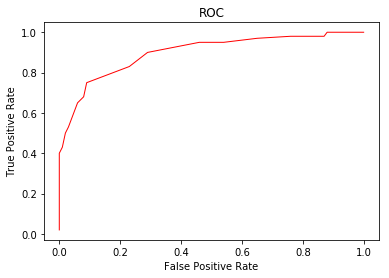

In [808]:
plt.title ("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot ( xy.x ,xy.y , color="red", linewidth=1.0 , linestyle ="-",label="punten")

plt.show()#.savefig ('naam.pdf', dpi =600 ,format ='pdf')

In [813]:

wb = openpyxl.load_workbook('TestSetSSE.xlsx')
Testset = wb['Blad1']

In [814]:
AanalVoldoetDrempleWaardeEnZwanger = 0
TotaalAantalZwanger = 0
DrempleWaarde = 0.78

In [815]:
for i in range(2, Testset.max_row + 1):
    if(Testset["U" + str(i)].value):
        TotaalAantalZwanger = TotaalAantalZwanger + 1
TotaalAantalZwanger    

60

In [816]:
for i in range(2, Testset.max_row + 1):
    if(Testset["U" + str(i)].value):
        if(Testset["V" + str(i)].value >= DrempleWaarde):
            AanalVoldoetDrempleWaardeEnZwanger = AanalVoldoetDrempleWaardeEnZwanger + 1
            
AanalVoldoetDrempleWaardeEnZwanger

24

In [817]:
MissedChance = AanalVoldoetDrempleWaardeEnZwanger / TotaalAantalZwanger * 100
print(str(MissedChance) + "% missed apportunity")

40.0% missed apportunity


In [819]:
AanalVoldoetDrempleWaardeEnNietZwanger = 0

In [820]:
for i in range(2, Testset.max_row + 1):
    if(Testset["U" + str(i)].value == 0):
        if(Testset["V" + str(i)].value >= DrempleWaarde):
            AanalVoldoetDrempleWaardeEnNietZwanger = AanalVoldoetDrempleWaardeEnNietZwanger + 1
            
AanalVoldoetDrempleWaardeEnNietZwanger

4

In [821]:
print(str(AanalVoldoetDrempleWaardeEnNietZwanger) + " people are considered pregnant but are not pregnant.")

4 people are considered pregnant but are not pregnant.
